In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite.sqlite")

In [3]:
checker = pd.io.sql.read_sql("SELECT timestamp From checker WHERE uid LIKE 'user_%'",
                               connection, parse_dates="timestamp")
checker

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


- create two lists of values (for working days and for weekends) for the histogram input
- the figsize is still the same, you can choose the fontsize as well as the color palette
- use a level of transparency for the histogram in front equal to 0.7

In [4]:
checker["day"] = checker["timestamp"].dt.day
checker["weekday"] = checker["timestamp"].dt.dayofweek
checker["hour"] = checker["timestamp"].dt.hour
checker

,timestamp,day,weekday,hour
0,2020-04-17 05:19:02.744528,17,4,5
1,2020-04-17 05:22:35.249331,17,4,5
2,2020-04-17 05:22:45.549397,17,4,5
3,2020-04-17 05:34:14.691200,17,4,5
4,2020-04-17 05:34:24.422370,17,4,5
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,21,3,20
3203,2020-05-21 20:22:41.785725,21,3,20
3204,2020-05-21 20:22:41.877806,21,3,20
3205,2020-05-21 20:37:00.129678,21,3,20


In [5]:
checker["weekday"].value_counts()

3    772
6    665
1    526
5    505
2    286
0    257
4    196
Name: weekday, dtype: int64

In [6]:
def ft_day(weekday):
    if weekday > 4:
        return "weekend"
    else:
        return "working_day"

In [7]:
checker["weekday"] = checker["weekday"].apply(ft_day)
checker

,timestamp,day,weekday,hour
0,2020-04-17 05:19:02.744528,17,working_day,5
1,2020-04-17 05:22:35.249331,17,working_day,5
2,2020-04-17 05:22:45.549397,17,working_day,5
3,2020-04-17 05:34:14.691200,17,working_day,5
4,2020-04-17 05:34:24.422370,17,working_day,5
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,21,working_day,20
3203,2020-05-21 20:22:41.785725,21,working_day,20
3204,2020-05-21 20:22:41.877806,21,working_day,20
3205,2020-05-21 20:37:00.129678,21,working_day,20


In [8]:
work = list(checker[checker["weekday"]=="working_day"]["hour"])
weekend = list(checker[checker["weekday"]=="weekend"]["hour"])
print(len(work))
print(len(weekend))

2037
1170


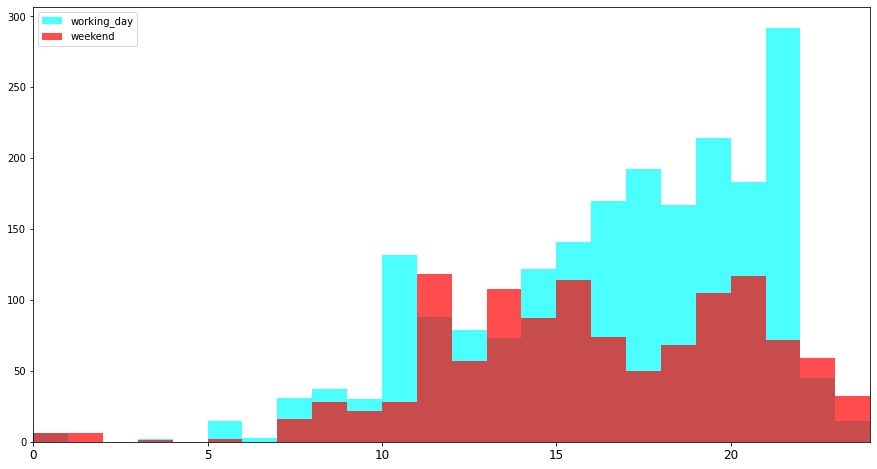

In [9]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=12)
plt.hist(work, stacked=True, bins=24, range=[0, 24], alpha=0.7, color="cyan", label="working_day")
plt.hist(weekend, stacked=True, bins=24, range=[0, 24], alpha=0.7, color="red", label="weekend")
plt.legend()
plt.xlim(0, 24)
plt.show()

at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
- “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

Answer: Yes, 11, 13, 22, 23.

In [10]:
connection.close()